# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


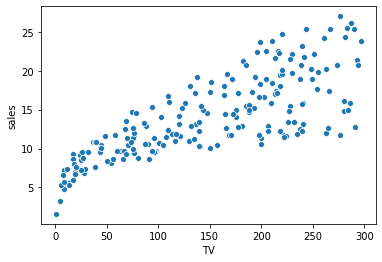

In [6]:
plt.figure()
sns.scatterplot(data=df,x="TV", y="sales")
plt.show()

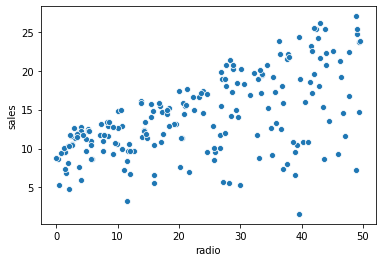

In [7]:
plt.figure()
sns.scatterplot(data=df,x="radio", y="sales")
plt.show()

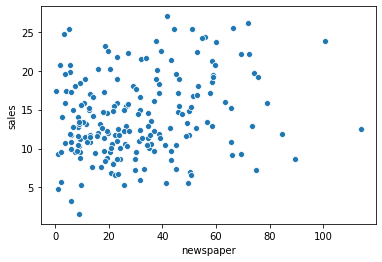

In [8]:
plt.figure()
sns.scatterplot(data=df,x="newspaper", y="sales")
plt.show()

In [9]:
cor = df.corr()

In [10]:
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


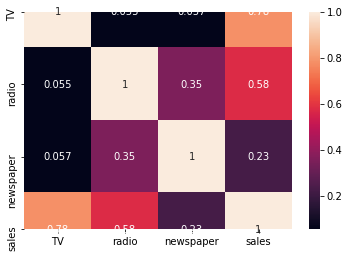

In [11]:
plt.figure()
sns.heatmap(cor,annot=True)
plt.show()

## Modeling with TV

In [12]:
X = df[["TV"]]
y = df["sales"]

### split data for train and test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

### Training

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lr.intercept_

6.923519536059554

In [17]:
lr.coef_

array([0.04812204])

### Testing

In [18]:
y_pred = lr.predict(X_test)

In [19]:
mean_squared_error(y_test,y_pred)

10.571057434656955

In [20]:
r2_score(y_test,y_pred)

0.575061860494331

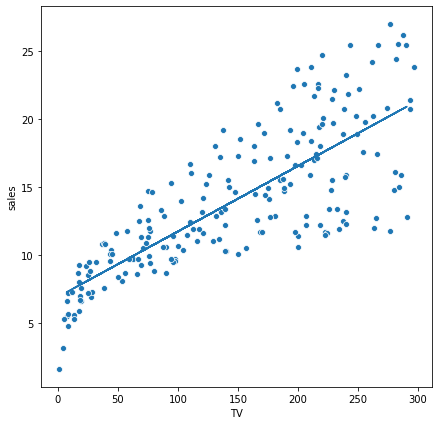

In [21]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="TV", y="sales")
plt.plot(X_test["TV"],y_pred)
plt.show()

## Modeling with Radio

In [22]:
X = df[["radio"]]
y = df["sales"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr.intercept_

9.440936561425886

In [26]:
lr.coef_

array([0.1874808])

In [27]:
y_pred = lr.predict(X_test)

In [28]:
mean_squared_error(y_test,y_pred)

14.604130559272193

In [29]:
r2_score(y_test,y_pred)

0.41293932917162335

## Modeling with Newspaper

In [30]:
X = df[["newspaper"]]
y = df["sales"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lr.intercept_

11.82966888487788

In [34]:
lr.coef_

array([0.06532045])

In [35]:
y_pred = lr.predict(X_test)

In [36]:
mean_squared_error(y_test,y_pred)

25.49745237441493

In [37]:
r2_score(y_test,y_pred)

-0.024953278429509007

## Multiple linear regression

In [38]:
X = df[["TV","radio","newspaper"]]
y = df["sales"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lr.intercept_

2.9372157346906125

In [42]:
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [43]:
y_pred = lr.predict(X_test)

In [44]:
mean_squared_error(y_test,y_pred)

1.9289249074665717

In [45]:
r2_score(y_test,y_pred)

0.9224605706201435

## Assumptions of Linear Regression

In [46]:
X = df[["TV","radio"]]
y = df["sales"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.3)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lr.intercept_

2.9647671191401574

In [50]:
lr.coef_

array([0.04697554, 0.17765046])

In [51]:
y_pred = lr.predict(X_test)

In [52]:
mean_squared_error(y_test,y_pred)

1.9147050289721788

In [53]:
r2_score(y_test,y_pred)

0.9230321850256801

In [54]:
residuals = y_test - y_pred

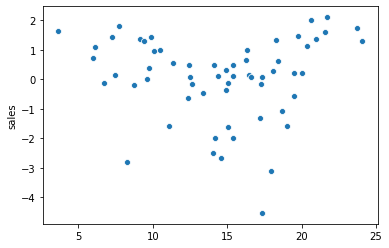

In [55]:
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

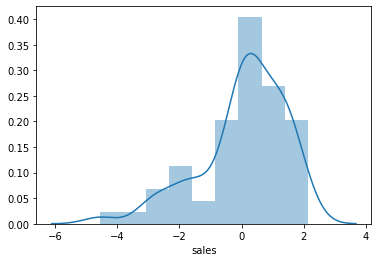

In [56]:
plt.figure()
sns.distplot(residuals)
plt.show()

# Polynomial regression

In [57]:
# Linear 
def poly_1(x):
    
    y = 4*x + 5
    return y    


# Quadratic
def poly_2(x):
    
    y = 6*(x**2) + 4*x + 5
    return y

# Cubic
def poly_3(x):
    
    y = 8*(x**3) + 6*(x**2) + 4*x + 5
    return y


# Plot
def plot(x,y):
    
    plt.figure()
    plt.plot(x,y)
    plt.show()

In [58]:
x = np.arange(-100,100)

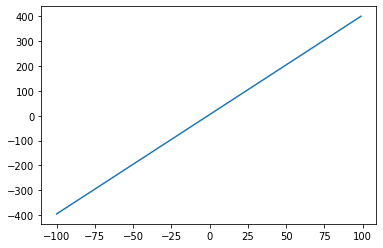

In [59]:
# plot linear relation

y = poly_1(x)
plot(x,y)

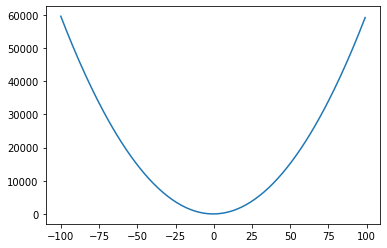

In [60]:
# plot quadratic relation

y = poly_2(x)
plot(x,y)

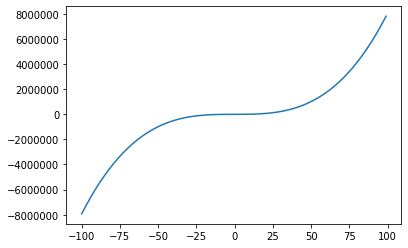

In [61]:
# plot cubic relation

y = poly_3(x)
plot(x,y)

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
X = df[["TV","radio"]]
y = df["sales"]

In [64]:
pf = PolynomialFeatures(2)

In [65]:
X_poly = pf.fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,random_state=1,test_size=0.3)

In [67]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred = lr.predict(X_test)

In [69]:
mean_squared_error(y_test,y_pred)

0.17238345081006942

In [70]:
r2_score(y_test,y_pred)

0.9930704848288269

In [71]:
residuals = y_test - y_pred

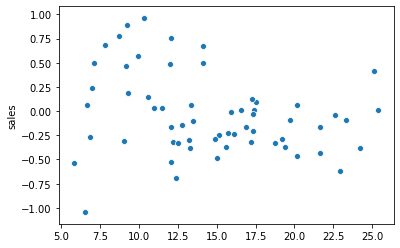

In [72]:
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

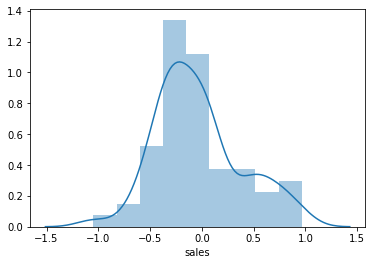

In [73]:
plt.figure()
sns.distplot(residuals)
plt.show()

# Gradient descent

In [78]:
def gradient_descent(x,y):
    
    
    n = len(x)
    learning_rate = 0.01
    intercept = slope = 0
    iterations = 5000
    
    for i in range(iterations):
        
        y_pred = x*slope + intercept
        
        mse = mean_squared_error(y_pred,y)
        
        md = (2/n)*sum(x*(y-y_pred))
        bd = (2/n)*sum(y-y_pred)

        slope = slope + (learning_rate * md)
        intercept = intercept + (learning_rate * bd)
        
        print("slope: ",slope,"\nintercept: ",intercept,"\nmse: ",mse,"\niteration: ",i,"\n-------------------")

In [79]:
x = np.array([1,2,3,4])
y = np.array([10,12,20,25])

In [80]:
gradient_descent(x,y)

slope:  0.97 
intercept:  0.335 
mse:  317.25 
iteration:  0 
-------------------
slope:  1.7777500000000002 
intercept:  0.6148 
mse:  220.731225 
iteration:  1 
-------------------
slope:  2.4503475000000003 
intercept:  0.8486165 
mse:  153.75819550875 
iteration:  2 
-------------------
slope:  3.0103645500000002 
intercept:  1.044126795 
mse:  107.28633784091286 
iteration:  3 
-------------------
slope:  3.47660352775 
intercept:  1.2077260316 
mse:  75.0398136576278 
iteration:  4 
-------------------
slope:  3.8647266970075 
intercept:  1.3447413345805002 
mse:  52.66395149586271 
iteration:  5 
-------------------
slope:  4.18778062572735 
intercept:  1.4596101730385151 
mse:  37.13713693958762 
iteration:  6 
-------------------
slope:  4.456633023216321 
intercept:  1.5560289382913772 
mse:  26.362735652850667 
iteration:  7 
-------------------
slope:  4.680336622819304 
intercept:  1.6370767083647335 
mse:  18.885937406570662 
iteration:  8 
-------------------
slope:  4.8

slope:  5.623164061739955 
intercept:  2.5498582496916438 
mse:  1.7266804638988968 
iteration:  156 
-------------------
slope:  5.62219653999438 
intercept:  2.5527028816108133 
mse:  1.7257735903892266 
iteration:  157 
-------------------
slope:  5.621231914914682 
intercept:  2.555538996978878 
mse:  1.7248721389328696 
iteration:  158 
-------------------
slope:  5.6202701778285356 
intercept:  2.5583666212935663 
mse:  1.723976077112234 
iteration:  159 
-------------------
slope:  5.619311320089577 
intercept:  2.561185779976268 
mse:  1.7230853727035351 
iteration:  160 
-------------------
slope:  5.618355333077327 
intercept:  2.563996498372264 
mse:  1.7221999936756593 
iteration:  161 
-------------------
slope:  5.617402208197115 
intercept:  2.566798801750952 
mse:  1.7213199081889905 
iteration:  162 
-------------------
slope:  5.61645193688 
intercept:  2.5695927153060776 
mse:  1.7204450845942865 
iteration:  163 
-------------------
slope:  5.615504510582696 
interc

slope:  5.486131934503289 
intercept:  2.9527494143878203 
mse:  1.6253182251891356 
iteration:  340 
-------------------
slope:  5.485574673608405 
intercept:  2.9543878293748995 
mse:  1.6250173804771348 
iteration:  341 
-------------------
slope:  5.485019081098399 
intercept:  2.9560213391069814 
mse:  1.6247183344680982 
iteration:  342 
-------------------
slope:  5.4844651519782905 
intercept:  2.9576499582699216 
mse:  1.6244210764078608 
iteration:  343 
-------------------
slope:  5.483912881268051 
intercept:  2.9592737015056088 
mse:  1.6241255956065666 
iteration:  344 
-------------------
slope:  5.4833622640025625 
intercept:  2.960892583412094 
mse:  1.6238318814382586 
iteration:  345 
-------------------
slope:  5.482813295231574 
intercept:  2.962506618543724 
mse:  1.6235399233405223 
iteration:  346 
-------------------
slope:  5.482265970019651 
intercept:  2.964115821411271 
mse:  1.6232497108140858 
iteration:  347 
-------------------
slope:  5.48172028344614 

slope:  5.395374765299771 
intercept:  3.2195865593821518 
mse:  1.5882114503424751 
iteration:  563 
-------------------
slope:  5.395089222535697 
intercept:  3.22042608992952 
mse:  1.5881324611698946 
iteration:  564 
-------------------
slope:  5.394804534658866 
intercept:  3.2212631070041446 
mse:  1.5880539442610864 
iteration:  565 
-------------------
slope:  5.394520699109829 
intercept:  3.2220976181311185 
mse:  1.5879758967924624 
iteration:  566 
-------------------
slope:  5.394237713336798 
intercept:  3.2229296308130047 
mse:  1.5878983159573112 
iteration:  567 
-------------------
slope:  5.393955574795628 
intercept:  3.2237591525299045 
mse:  1.5878211989657074 
iteration:  568 
-------------------
slope:  5.393674280949789 
intercept:  3.224586190739525 
mse:  1.587744543044401 
iteration:  569 
-------------------
slope:  5.393393829270344 
intercept:  3.225410752877245 
mse:  1.5876683454367284 
iteration:  570 
-------------------
slope:  5.393114217235929 
in

slope:  5.351580484339023 
intercept:  3.3483470859741593 
mse:  1.5788641534454504 
iteration:  768 
-------------------
slope:  5.351426057389462 
intercept:  3.348801120037725 
mse:  1.5788410502830066 
iteration:  769 
-------------------
slope:  5.351272092779157 
intercept:  3.349253794767497 
mse:  1.5788180852507168 
iteration:  770 
-------------------
slope:  5.351118589123908 
intercept:  3.3497051142331893 
mse:  1.5787952575227235 
iteration:  771 
-------------------
slope:  5.350965545043663 
intercept:  3.3501550824923303 
mse:  1.5787725662781074 
iteration:  772 
-------------------
slope:  5.350812959162497 
intercept:  3.3506037035903007 
mse:  1.5787500107008572 
iteration:  773 
-------------------
slope:  5.350660830108608 
intercept:  3.3510509815603697 
mse:  1.5787275899798332 
iteration:  774 
-------------------
slope:  5.350509156514298 
intercept:  3.351496920423732 
mse:  1.5787053033087584 
iteration:  775 
-------------------
slope:  5.350357937015967 


slope:  5.329977113066532 
intercept:  3.4118636319748137 
mse:  1.5763051581636616 
iteration:  949 
-------------------
slope:  5.329887364507811 
intercept:  3.4121275036819907 
mse:  1.5762973548293766 
iteration:  950 
-------------------
slope:  5.329797884647539 
intercept:  3.41239058538296 
mse:  1.576289598149991 
iteration:  951 
-------------------
slope:  5.32970867268126 
intercept:  3.412652879442924 
mse:  1.5762818878465656 
iteration:  952 
-------------------
slope:  5.329619727806925 
intercept:  3.412914388220002 
mse:  1.5762742236418255 
iteration:  953 
-------------------
slope:  5.329531049224886 
intercept:  3.4131751140652558 
mse:  1.5762666052601535 
iteration:  954 
-------------------
slope:  5.32944263613789 
intercept:  3.4134350593227065 
mse:  1.576259032427582 
iteration:  955 
-------------------
slope:  5.329354487751071 
intercept:  3.413694226329358 
mse:  1.5762515048717785 
iteration:  956 
-------------------
slope:  5.329266603271942 
interc

intercept:  3.452047477823927 
mse:  1.575386345407495 
iteration:  1152 
-------------------
slope:  5.3162608755211656 
intercept:  3.4521910430078977 
mse:  1.5753840355093927 
iteration:  1153 
-------------------
slope:  5.316212192042596 
intercept:  3.4523341783716814 
mse:  1.5753817394218088 
iteration:  1154 
-------------------
slope:  5.316163654317623 
intercept:  3.452476885202118 
mse:  1.5753794570621642 
iteration:  1155 
-------------------
slope:  5.316115261909873 
intercept:  3.452619164782195 
mse:  1.575377188348393 
iteration:  1156 
-------------------
slope:  5.3160670143842825 
intercept:  3.4527610183910573 
mse:  1.5753749331988987 
iteration:  1157 
-------------------
slope:  5.316018911307087 
intercept:  3.452902447304022 
mse:  1.5753726915325887 
iteration:  1158 
-------------------
slope:  5.315970952245823 
intercept:  3.4530434527925875 
mse:  1.5753704632688426 
iteration:  1159 
-------------------
slope:  5.31592313676932 
intercept:  3.4531840

slope:  5.309422065731738 
intercept:  3.4722979777590015 
mse:  1.5751289364746492 
iteration:  1335 
-------------------
slope:  5.309393856984027 
intercept:  3.4723809149172347 
mse:  1.5751281655838558 
iteration:  1336 
-------------------
slope:  5.309365732690561 
intercept:  3.4724636037696888 
mse:  1.575127399302096 
iteration:  1337 
-------------------
slope:  5.3093376925984925 
intercept:  3.472546045059767 
mse:  1.575126637601812 
iteration:  1338 
-------------------
slope:  5.30930973645573 
intercept:  3.472628239528647 
mse:  1.5751258804556172 
iteration:  1339 
-------------------
slope:  5.309281864010938 
intercept:  3.4727101879152875 
mse:  1.575125127836278 
iteration:  1340 
-------------------
slope:  5.309254075013532 
intercept:  3.472791890956435 
mse:  1.5751243797167296 
iteration:  1341 
-------------------
slope:  5.309226369213681 
intercept:  3.4728733493866293 
mse:  1.5751236360700696 
iteration:  1342 
-------------------
slope:  5.309198746362

slope:  5.305558549126363 
intercept:  3.4836571877218505 
mse:  1.5750448752032744 
iteration:  1511 
-------------------
slope:  5.305541907371316 
intercept:  3.483706116511095 
mse:  1.5750446069015316 
iteration:  1512 
-------------------
slope:  5.305525315440064 
intercept:  3.4837548988123075 
mse:  1.5750443402039194 
iteration:  1513 
-------------------
slope:  5.305508773183439 
intercept:  3.483803535064058 
mse:  1.575044075100851 
iteration:  1514 
-------------------
slope:  5.30549228045272 
intercept:  3.4838520257036047 
mse:  1.575043811582794 
iteration:  1515 
-------------------
slope:  5.305475837099632 
intercept:  3.4839003711668965 
mse:  1.5750435496402668 
iteration:  1516 
-------------------
slope:  5.305459442976342 
intercept:  3.483948571888577 
mse:  1.5750432892638537 
iteration:  1517 
-------------------
slope:  5.305443097935462 
intercept:  3.4839966283019885 
mse:  1.5750430304441898 
iteration:  1518 
-------------------
slope:  5.305426801830

slope:  5.302682441909152 
intercept:  3.492113293672195 
mse:  1.5750104506711884 
iteration:  1754 
-------------------
slope:  5.3026744109391695 
intercept:  3.492136905703293 
mse:  1.5750103881882767 
iteration:  1755 
-------------------
slope:  5.302666404013129 
intercept:  3.4921604470422687 
mse:  1.5750103260789396 
iteration:  1756 
-------------------
slope:  5.302658421059046 
intercept:  3.4921839179007668 
mse:  1.5750102643409478 
iteration:  1757 
-------------------
slope:  5.302650462005151 
intercept:  3.492207318489799 
mse:  1.5750102029720767 
iteration:  1758 
-------------------
slope:  5.302642526779889 
intercept:  3.4922306490197457 
mse:  1.5750101419701183 
iteration:  1759 
-------------------
slope:  5.302634615311918 
intercept:  3.492253909700356 
mse:  1.5750100813328844 
iteration:  1760 
-------------------
slope:  5.302626727530113 
intercept:  3.492277100740753 
mse:  1.5750100210581883 
iteration:  1761 
-------------------
slope:  5.3026188633

mse:  1.5750035724133744 
iteration:  1933 
-------------------
slope:  5.301563640467245 
intercept:  3.4954027063455273 
mse:  1.5750035510544806 
iteration:  1934 
-------------------
slope:  5.301558959079882 
intercept:  3.4954164701952544 
mse:  1.5750035298232854 
iteration:  1935 
-------------------
slope:  5.301554291708137 
intercept:  3.4954301928373552 
mse:  1.5750035087190313 
iteration:  1936 
-------------------
slope:  5.301549638310049 
intercept:  3.4954438743952014 
mse:  1.5750034877409564 
iteration:  1937 
-------------------
slope:  5.301544998843782 
intercept:  3.495457514991795 
mse:  1.5750034668883037 
iteration:  1938 
-------------------
slope:  5.301540373267625 
intercept:  3.49547111474977 
mse:  1.5750034461603268 
iteration:  1939 
-------------------
slope:  5.301535761539992 
intercept:  3.495484673791393 
mse:  1.57500342555628 
iteration:  1940 
-------------------
slope:  5.301531163619424 
intercept:  3.4954981922385655 
mse:  1.57500340507542

slope:  5.300791663733079 
intercept:  3.4976724120839777 
mse:  1.5750009102591065 
iteration:  2161 
-------------------
slope:  5.3007892935689185 
intercept:  3.497679380655644 
mse:  1.5750009048168099 
iteration:  2162 
-------------------
slope:  5.300786930500799 
intercept:  3.497686328364085 
mse:  1.575000899407054 
iteration:  2163 
-------------------
slope:  5.300784574507475 
intercept:  3.4976932552717637 
mse:  1.5750008940296416 
iteration:  2164 
-------------------
slope:  5.300782225567765 
intercept:  3.497700161440955 
mse:  1.5750008886843796 
iteration:  2165 
-------------------
slope:  5.300779883660553 
intercept:  3.4977070469337477 
mse:  1.575000883371077 
iteration:  2166 
-------------------
slope:  5.300777548764783 
intercept:  3.497713911812045 
mse:  1.5750008780895404 
iteration:  2167 
-------------------
slope:  5.300775220859463 
intercept:  3.497720756137565 
mse:  1.5750008728395821 
iteration:  2168 
-------------------
slope:  5.300772899923

slope:  5.300457341665171 
intercept:  3.4986553597330956 
mse:  1.5750003037841218 
iteration:  2344 
-------------------
slope:  5.300455972428741 
intercept:  3.4986593854551753 
mse:  1.5750003019678445 
iteration:  2345 
-------------------
slope:  5.3004546072916705 
intercept:  3.4986633991246348 
mse:  1.5750003001624249 
iteration:  2346 
-------------------
slope:  5.3004532462416885 
intercept:  3.4986674007775584 
mse:  1.5750002983678015 
iteration:  2347 
-------------------
slope:  5.300451889266557 
intercept:  3.498671390449923 
mse:  1.575000296583907 
iteration:  2348 
-------------------
slope:  5.300450536354077 
intercept:  3.498675368177597 
mse:  1.5750002948106814 
iteration:  2349 
-------------------
slope:  5.300449187492085 
intercept:  3.498679333996341 
mse:  1.5750002930480538 
iteration:  2350 
-------------------
slope:  5.300447842668455 
intercept:  3.4986832879418097 
mse:  1.5750002912959657 
iteration:  2351 
-------------------
slope:  5.30044650

slope:  5.300230856672412 
intercept:  3.4993212532309026 
mse:  1.575000077404891 
iteration:  2572 
-------------------
slope:  5.300230165510005 
intercept:  3.499323285332664 
mse:  1.5750000769420984 
iteration:  2573 
-------------------
slope:  5.300229476416871 
intercept:  3.4993253113505105 
mse:  1.575000076482073 
iteration:  2574 
-------------------
slope:  5.300228789386815 
intercept:  3.499327331302657 
mse:  1.575000076024799 
iteration:  2575 
-------------------
slope:  5.30022810441366 
intercept:  3.499329345207263 
mse:  1.57500007557026 
iteration:  2576 
-------------------
slope:  5.300227421491248 
intercept:  3.499331353082435 
mse:  1.575000075118435 
iteration:  2577 
-------------------
slope:  5.3002267406134385 
intercept:  3.499333354946224 
mse:  1.5750000746693134 
iteration:  2578 
-------------------
slope:  5.3002260617741115 
intercept:  3.4993353508166276 
mse:  1.5750000742228787 
iteration:  2579 
-------------------
slope:  5.300225384967163 

slope:  5.300118291904115 
intercept:  3.499652207376594 
mse:  1.5750000203232701 
iteration:  2795 
-------------------
slope:  5.300117937749668 
intercept:  3.499653248633856 
mse:  1.5750000202017589 
iteration:  2796 
-------------------
slope:  5.300117584655525 
intercept:  3.4996542867736955 
mse:  1.5750000200809766 
iteration:  2797 
-------------------
slope:  5.300117232618511 
intercept:  3.499655321805445 
mse:  1.5750000199609169 
iteration:  2798 
-------------------
slope:  5.3001168816354625 
intercept:  3.499656353738411 
mse:  1.5750000198415726 
iteration:  2799 
-------------------
slope:  5.300116531703223 
intercept:  3.4996573825818698 
mse:  1.5750000197229435 
iteration:  2800 
-------------------
slope:  5.300116182818646 
intercept:  3.4996584083450712 
mse:  1.5750000196050222 
iteration:  2801 
-------------------
slope:  5.3001158349785955 
intercept:  3.4996594310372378 
mse:  1.5750000194878082 
iteration:  2802 
-------------------
slope:  5.30011548

slope:  5.300062458200953 
intercept:  3.4998163652726277 
mse:  1.5750000056658162 
iteration:  3008 
-------------------
slope:  5.300062271207179 
intercept:  3.4998169150571274 
mse:  1.5750000056319406 
iteration:  3009 
-------------------
slope:  5.300062084773246 
intercept:  3.499817463195626 
mse:  1.5750000055982687 
iteration:  3010 
-------------------
slope:  5.300061898897478 
intercept:  3.499818009693051 
mse:  1.5750000055647975 
iteration:  3011 
-------------------
slope:  5.300061713578203 
intercept:  3.499818554554316 
mse:  1.5750000055315263 
iteration:  3012 
-------------------
slope:  5.300061528813757 
intercept:  3.4998190977843198 
mse:  1.5750000054984545 
iteration:  3013 
-------------------
slope:  5.300061344602478 
intercept:  3.4998196393879457 
mse:  1.5750000054655806 
iteration:  3014 
-------------------
slope:  5.300061160942708 
intercept:  3.499820179370063 
mse:  1.575000005432902 
iteration:  3015 
-------------------
slope:  5.30006097783

slope:  5.300028815460384 
intercept:  3.499915279032522 
mse:  1.5750000012059637 
iteration:  3266 
-------------------
slope:  5.3000287291897 
intercept:  3.4999155326788522 
mse:  1.5750000011987557 
iteration:  3267 
-------------------
slope:  5.300028643177303 
intercept:  3.4999157855657903 
mse:  1.575000001191587 
iteration:  3268 
-------------------
slope:  5.300028557422418 
intercept:  3.4999160376956095 
mse:  1.575000001184463 
iteration:  3269 
-------------------
slope:  5.300028471924275 
intercept:  3.4999162890705766 
mse:  1.575000001177381 
iteration:  3270 
-------------------
slope:  5.300028386682105 
intercept:  3.4999165396929515 
mse:  1.5750000011703418 
iteration:  3271 
-------------------
slope:  5.300028301695142 
intercept:  3.499916789564987 
mse:  1.5750000011633458 
iteration:  3272 
-------------------
slope:  5.300028216962621 
intercept:  3.4999170386889302 
mse:  1.5750000011563883 
iteration:  3273 
-------------------
slope:  5.3000281324837

slope:  5.30001530609421 
intercept:  3.499954998216495 
mse:  1.5750000003402613 
iteration:  3477 
-------------------
slope:  5.300015260269253 
intercept:  3.4999551329474548 
mse:  1.5750000003382265 
iteration:  3478 
-------------------
slope:  5.300015214581492 
intercept:  3.499955267275043 
mse:  1.5750000003362061 
iteration:  3479 
-------------------
slope:  5.300015169030516 
intercept:  3.4999554012004674 
mse:  1.5750000003341953 
iteration:  3480 
-------------------
slope:  5.300015123615915 
intercept:  3.4999555347249323 
mse:  1.5750000003321964 
iteration:  3481 
-------------------
slope:  5.300015078337281 
intercept:  3.4999556678496377 
mse:  1.5750000003302105 
iteration:  3482 
-------------------
slope:  5.300015033194207 
intercept:  3.499955800575781 
mse:  1.5750000003282374 
iteration:  3483 
-------------------
slope:  5.300014988186287 
intercept:  3.4999559329045553 
mse:  1.575000000326274 
iteration:  3484 
-------------------
slope:  5.30001494331

slope:  5.3000080333087505 
intercept:  3.4999763810926403 
mse:  1.5750000000937279 
iteration:  3692 
-------------------
slope:  5.300008009257806 
intercept:  3.4999764518053498 
mse:  1.5750000000931685 
iteration:  3693 
-------------------
slope:  5.300007985278867 
intercept:  3.4999765223063526 
mse:  1.5750000000926123 
iteration:  3694 
-------------------
slope:  5.30000796137172 
intercept:  3.499976592596282 
mse:  1.575000000092058 
iteration:  3695 
-------------------
slope:  5.300007937536148 
intercept:  3.4999766626757705 
mse:  1.5750000000915054 
iteration:  3696 
-------------------
slope:  5.300007913771937 
intercept:  3.4999767325454476 
mse:  1.5750000000909603 
iteration:  3697 
-------------------
slope:  5.3000078900788745 
intercept:  3.499976802205942 
mse:  1.5750000000904179 
iteration:  3698 
-------------------
slope:  5.300007866456746 
intercept:  3.4999768716578794 
mse:  1.5750000000898743 
iteration:  3699 
-------------------
slope:  5.30000784

mse:  1.5750000000274136 
iteration:  3897 
-------------------
slope:  5.300004331558726 
intercept:  3.499987264689127 
mse:  1.5750000000272502 
iteration:  3898 
-------------------
slope:  5.30000431859046 
intercept:  3.499987302817408 
mse:  1.5750000000270858 
iteration:  3899 
-------------------
slope:  5.30000430566102 
intercept:  3.4999873408315367 
mse:  1.5750000000269246 
iteration:  3900 
-------------------
slope:  5.30000429277029 
intercept:  3.499987378731855 
mse:  1.5750000000267628 
iteration:  3901 
-------------------
slope:  5.300004279918154 
intercept:  3.4999874165187035 
mse:  1.5750000000266047 
iteration:  3902 
-------------------
slope:  5.300004267104495 
intercept:  3.499987454192422 
mse:  1.575000000026445 
iteration:  3903 
-------------------
slope:  5.3000042543292 
intercept:  3.4999874917533487 
mse:  1.5750000000262865 
iteration:  3904 
-------------------
slope:  5.300004241592153 
intercept:  3.499987529201822 
mse:  1.5750000000261293 
i

slope:  5.3000020164472055 
intercept:  3.499994071399317 
mse:  1.5750000000059055 
iteration:  4153 
-------------------
slope:  5.300002010410159 
intercept:  3.4999940891489705 
mse:  1.5750000000058701 
iteration:  4154 
-------------------
slope:  5.300002004391187 
intercept:  3.499994106845483 
mse:  1.5750000000058348 
iteration:  4155 
-------------------
slope:  5.3000019983902344 
intercept:  3.4999941244890143 
mse:  1.5750000000058 
iteration:  4156 
-------------------
slope:  5.300001992407249 
intercept:  3.4999941420797223 
mse:  1.575000000005765 
iteration:  4157 
-------------------
slope:  5.300001986442175 
intercept:  3.4999941596177653 
mse:  1.5750000000057327 
iteration:  4158 
-------------------
slope:  5.300001980494961 
intercept:  3.4999941771033014 
mse:  1.575000000005697 
iteration:  4159 
-------------------
slope:  5.300001974565552 
intercept:  3.4999941945364874 
mse:  1.5750000000056645 
iteration:  4160 
-------------------
slope:  5.30000196865

slope:  5.300001061497848 
intercept:  3.49999687906688 
mse:  1.5750000000016362 
iteration:  4367 
-------------------
slope:  5.300001058319826 
intercept:  3.4999968884106503 
mse:  1.5750000000016258 
iteration:  4368 
-------------------
slope:  5.30000105515132 
intercept:  3.499996897726446 
mse:  1.5750000000016182 
iteration:  4369 
-------------------
slope:  5.300001051992299 
intercept:  3.499996907014351 
mse:  1.5750000000016064 
iteration:  4370 
-------------------
slope:  5.300001048842737 
intercept:  3.499996916274449 
mse:  1.5750000000015987 
iteration:  4371 
-------------------
slope:  5.300001045702604 
intercept:  3.499996925506823 
mse:  1.5750000000015896 
iteration:  4372 
-------------------
slope:  5.300001042571872 
intercept:  3.4999969347115565 
mse:  1.575000000001578 
iteration:  4373 
-------------------
slope:  5.300001039450514 
intercept:  3.499996943888732 
mse:  1.5750000000015678 
iteration:  4374 
-------------------
slope:  5.3000010363385 


slope:  5.300000535822296 
intercept:  3.4999984246171096 
mse:  1.575000000000417 
iteration:  4595 
-------------------
slope:  5.300000534218096 
intercept:  3.499998429333653 
mse:  1.5750000000004136 
iteration:  4596 
-------------------
slope:  5.300000532618699 
intercept:  3.499998434036075 
mse:  1.5750000000004116 
iteration:  4597 
-------------------
slope:  5.30000053102409 
intercept:  3.4999984387244183 
mse:  1.575000000000408 
iteration:  4598 
-------------------
slope:  5.300000529434256 
intercept:  3.4999984433987255 
mse:  1.5750000000004074 
iteration:  4599 
-------------------
slope:  5.300000527849181 
intercept:  3.499998448059038 
mse:  1.5750000000004045 
iteration:  4600 
-------------------
slope:  5.300000526268852 
intercept:  3.499998452705398 
mse:  1.575000000000403 
iteration:  4601 
-------------------
slope:  5.300000524693255 
intercept:  3.4999984573378478 
mse:  1.5750000000003996 
iteration:  4602 
-------------------
slope:  5.30000052312237

slope:  5.300000276208948 
intercept:  3.4999991879120085 
mse:  1.5750000000001119 
iteration:  4816 
-------------------
slope:  5.300000275382005 
intercept:  3.499999190343321 
mse:  1.5750000000001094 
iteration:  4817 
-------------------
slope:  5.300000274557538 
intercept:  3.4999991927673544 
mse:  1.5750000000001088 
iteration:  4818 
-------------------
slope:  5.30000027373554 
intercept:  3.4999991951841305 
mse:  1.5750000000001094 
iteration:  4819 
-------------------
slope:  5.3000002729160025 
intercept:  3.499999197593671 
mse:  1.5750000000001088 
iteration:  4820 
-------------------
slope:  5.300000272098918 
intercept:  3.4999991999959974 
mse:  1.5750000000001085 
iteration:  4821 
-------------------
slope:  5.300000271284281 
intercept:  3.4999992023911317 
mse:  1.5750000000001074 
iteration:  4822 
-------------------
slope:  5.300000270472083 
intercept:  3.499999204779095 
mse:  1.5750000000001063 
iteration:  4823 
-------------------
slope:  5.300000269